# Import

In [0]:
import scipy.io as sio
import numpy as np
import matplotlib.pylab as plt
import keras.utils as kutils

In [0]:
# Set random seed

np.random.seed(20)

# Data loading and preprocessing


In [2]:
# Unzip dataset to have it usable in current directory

!unzip /content/drive/My\ Drive/svhndataset.zip

MessageError: ignored

In [0]:
# Load the three dataset parts by using loadmat from scipy.io

train_data = sio.loadmat('train_32x32.mat')
test_data = sio.loadmat('test_32x32.mat')
extra_data = sio.loadmat('extra_32x32.mat')


The data previously loaded are stored in a dictionnary of two keys : X and y .
Data associated to X are street number images wheras data associated to y are the correct numbers written on the images (the value we want to predict).

Thus, we're going to split each part of the dataset in two : the images and their corresponding labels.

In [0]:
train_images, train_labels = train_data['X'], train_data['y']
test_images, test_labels = test_data['X'], test_data['y']
extra_images, extra_labels = extra_data['X'], extra_data['y']

In [23]:
# Check the shape of the data

print(train_images.shape, test_images.shape, extra_images.shape)
print(train_labels.shape, test_labels.shape, extra_labels.shape)

(32, 32, 3, 73257) (32, 32, 3, 26032) (32, 32, 3, 531131)
(73257, 1) (26032, 1) (531131, 1)


In [24]:
# Reorder to match axis of tensorflow

train_images = np.transpose(train_images,(3,0,1,2))
test_images = np.transpose(test_images,(3,0,1,2))
extra_images = np.transpose(extra_images,(3,0,1,2))

print(train_images.shape, test_images.shape, extra_images.shape)

(73257, 32, 32, 3) (26032, 32, 32, 3) (531131, 32, 32, 3)


In [25]:
# Merge extra data with train data (to enlarge our training dataset)

train_images = np.concatenate([train_images, extra_images])
train_labels = np.concatenate([train_labels, extra_labels])

print(train_images.shape, train_labels.shape)

(604388, 32, 32, 3) (604388, 1)


Each pixel of an image is composed of three channels (R, V and B) and the values of these channels are between 0 and 255. To help our CNN to converge, we need to normalize our data (e.g. convert value from 0-255 range to 0-1 range).

In [0]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

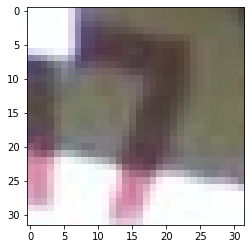

Label:  [7]


In [28]:
# Plot a random image and its label

plt.imshow(train_images[21918])
plt.show()

print('Label: ', train_labels[21918])

It's easier for a model to predict a percentage of membership for each category (0 to 9) than to predict a number. This is because it enable the model to separate each category and then give special weight to each category.

Therefore, we need to transform our label in an array of ten category (one for each number) and attribute 1 to the good field. But don't worry, kera.utils is here for us and provides to_categorical which do exactly what we need.


In [29]:
# 0 are marked as 10 in the datasets, so to have a good categorization, we need to mark it as 0

train_labels[train_labels == 10] = 0
test_labels[test_labels == 10] = 0

# Then we can categorize our labels

print(train_labels[:5])
train_labels = kutils.to_categorical(train_labels)
test_labels = kutils.to_categorical(test_labels)
print(train_labels[:5])

[[1]
 [9]
 [2]
 [3]
 [2]]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
